<a href="https://colab.research.google.com/github/Bharatgwl/DEEPFAKE/blob/main/SDXL_TRAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -U transformers \accelerate \peft \safetensors

In [ ]:
import torch
import diffusers
import transformers
import peft

print(f"PyTorch version: {torch.__version__}")
print(f"Diffusers version: {diffusers.__version__}")
print(f"PEFT version: {peft.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
else:
    print("Warning: No GPU detected. Training will be extremely slow.")

PyTorch version: 2.9.0+cu128
Diffusers version: 0.37.0.dev0
PEFT version: 0.18.1
CUDA available: True
GPU: Tesla T4


In [ ]:
ZIP_PATH = "/content/drive/MyDrive/sdxl_dreambooth_inputs/dreambooth_images_20260215_154730.zip"

In [ ]:
!ls /content/training_images

'WhatsApp Image 2026-02-15 at 12.09.18 AM.jpeg'
'WhatsApp Image 2026-02-15 at 12.09.19 AM.jpeg'
'WhatsApp Image 2026-02-15 at 12.09.20 AM.jpeg'
'WhatsApp Image 2026-02-15 at 12.09.21 AM.jpeg'
'WhatsApp Image 2026-02-15 at 12.09.22 AM.jpeg'
'WhatsApp Image 2026-02-15 at 12.09.24 AM.jpeg'
'WhatsApp Image 2026-02-15 at 12.09.25 AM.jpeg'
'WhatsApp Image 2026-02-15 at 12.09.26 AM.jpeg'
'WhatsApp Image 2026-02-15 at 12.09.28 AM.jpeg'
'WhatsApp Image 2026-02-15 at 12.09.29 AM.jpeg'
'WhatsApp Image 2026-02-15 at 12.15.35 AM.jpeg'
'WhatsApp Image 2026-02-15 at 12.15.36 AM.jpeg'
'WhatsApp Image 2026-02-15 at 12.15.37 AM.jpeg'
'WhatsApp Image 2026-02-15 at 12.15.37AM.jpeg'
'WhatsApp Image 2026-02-15 at 12.15.38 AM.jpeg'
'WhatsApp Image 2026-02-15 at 12.15.38AM.jpeg'
'WhatsApp Image 2026-02-15 at 12.15.39 AM.jpeg'
'WhatsApp Image 2026-02-15 at 12.15.40 AM.jpeg'
'WhatsApp Image 2026-02-15 at 12.15.41 AM.jpeg'
'WhatsApp Image 2026-02-15 at 12.15.42 AM.jpeg'


In [ ]:
import os, zipfile
IMAGE_DIR = "/content/training_images"
os.makedirs(IMAGE_DIR, exist_ok=True)

with zipfile.ZipFile(ZIP_PATH, "r") as z:
    z.extractall(IMAGE_DIR)

print(f"✅ Extracted {len(os.listdir(IMAGE_DIR))} images")

✅ Extracted 20 images


In [ ]:
from huggingface_hub import login

# Get your token from: https://huggingface.co/settings/tokens
login()

In [ ]:
!pip uninstall -y diffusers

Found existing installation: diffusers 0.36.0
Uninstalling diffusers-0.36.0:
  Successfully uninstalled diffusers-0.36.0


In [ ]:
!pwd

/content


In [ ]:
!git clone https://github.com/huggingface/diffusers

Cloning into 'diffusers'...
remote: Enumerating objects: 116603, done.
remote: Counting objects: 100% (738/738), done.
remote: Compressing objects: 100% (448/448), done.
remote: Total 116603 (delta 478), reused 289 (delta 289), pack-reused 115865 (from 4)
Receiving objects: 100% (116603/116603), 91.97 MiB | 30.59 MiB/s, done.
Resolving deltas: 100% (86808/86808), done.


In [ ]:
import diffusers; print(diffusers.__version__)

0.37.0.dev0


In [29]:

!accelerate launch \
  examples/dreambooth/train_dreambooth_lora_sdxl.py \
  --pretrained_model_name_or_path stabilityai/stable-diffusion-xl-base-1.0 \
  --instance_data_dir="/content/training_images" \
  --output_dir="/content/sdxl_lora" \
  --instance_prompt="a photo of Sumit person" \
  --resolution=768 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --learning_rate=1e-4 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=800 \
  --checkpointing_steps=200 \
  --mixed_precision="fp16"
print("✅ Training complete!")



The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
/usr/lo

In [30]:
from huggingface_hub import HfApi, create_repo

REPO_ID = "Bharatgwl/sdxl-Sumit-lora"

# Create repository
create_repo(REPO_ID, repo_type="model", private=True, exist_ok=True)
print(f"✅ Created repo: {REPO_ID}")

✅ Created repo: Bharatgwl/sdxl-Sumit-lora


In [31]:
model_card = """---
license: creativeml-openrail-m
base_model: stabilityai/stable-diffusion-xl-base-1.0
tags:
  - stable-diffusion-xl
  - stable-diffusion-xl-diffusers
  - text-to-image
  - diffusers
  - lora
  - dreambooth
instance_prompt: a photo of Sumit person
---

# SDXL DreamBooth LoRA - sdxl-Sumit-lora

This is a LoRA (Low-Rank Adaptation) model trained with DreamBooth on Stable Diffusion XL.

## Trigger Word
`Sumit`

## Usage
```python
from diffusers import StableDiffusionXLPipeline
import torch

pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16
).to("cuda")

pipe.load_lora_weights("Bharatgwl/sdxl-Sumit-lora")

prompt = "a photo of Sumit person, professional portrait, studio lighting"
image = pipe(prompt, num_inference_steps=30).images[0]
image.save("output.png")
```

## Training Details
- **Base Model:** stabilityai/stable-diffusion-xl-base-1.0
- **Training Steps:** 800
- **Learning Rate:** 0.0001
- **Resolution:** 1024x1024 // low device ? : 512x512
- **Batch Size:** 1
- **Instance Prompt:** a photo of Sumit person
- **Images:** 14
"""

with open("/content/sdxl_lora/README.md", "w") as f:
    f.write(model_card)

In [32]:
api = HfApi()
api.upload_folder(
    folder_path="/content/sdxl_lora",
    repo_id=REPO_ID,
    repo_type="model"
)

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  .../checkpoint-600/scaler.pt: 100%|##########| 1.38kB / 1.38kB            

  ...ckpoint-600/scheduler.bin: 100%|##########| 1.40kB / 1.40kB            

  ..._lora_weights.safetensors:   0%|          | 94.1kB / 23.4MB            

  ...ckpoint-800/optimizer.bin:   0%|          |  178kB / 47.4MB            

  ..._lora_weights.safetensors:   0%|          | 94.1kB / 23.4MB            

  ..._lora_weights.safetensors:   0%|          | 94.1kB / 23.4MB            

  ...ckpoint-200/optimizer.bin:   0%|          |  178kB / 47.4MB            

  ...ckpoint-200/scheduler.bin: 100%|##########| 1.40kB / 1.40kB            

  ..._lora_weights.safetensors:   0%|          | 94.1kB / 23.4MB            

  .../checkpoint-200/scaler.pt: 100%|##########| 1.38kB / 1.38kB            

CommitInfo(commit_url='https://huggingface.co/Bharatgwl/sdxl-Sumit-lora/commit/026ebe8ac2b09dd3f067511a5c34b65be5c5d8d0', commit_message='Upload folder using huggingface_hub', commit_description='', oid='026ebe8ac2b09dd3f067511a5c34b65be5c5d8d0', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Bharatgwl/sdxl-Sumit-lora', endpoint='https://huggingface.co', repo_type='model', repo_id='Bharatgwl/sdxl-Sumit-lora'), pr_revision=None, pr_num=None)

In [33]:

print(f"🎉 Model uploaded successfully!")
print(f"View at: https://huggingface.co/{REPO_ID}")


🎉 Model uploaded successfully!
View at: https://huggingface.co/Bharatgwl/sdxl-Sumit-lora


In [34]:
from diffusers import StableDiffusionXLPipeline
import torch

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/517 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new
No LoRA keys associated to CLIPTextModelWithProjection found with the prefix='text_encoder_2'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModelWithProjection related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


Generating test images...


  0%|          | 0/30 [00:00<?, ?it/s]

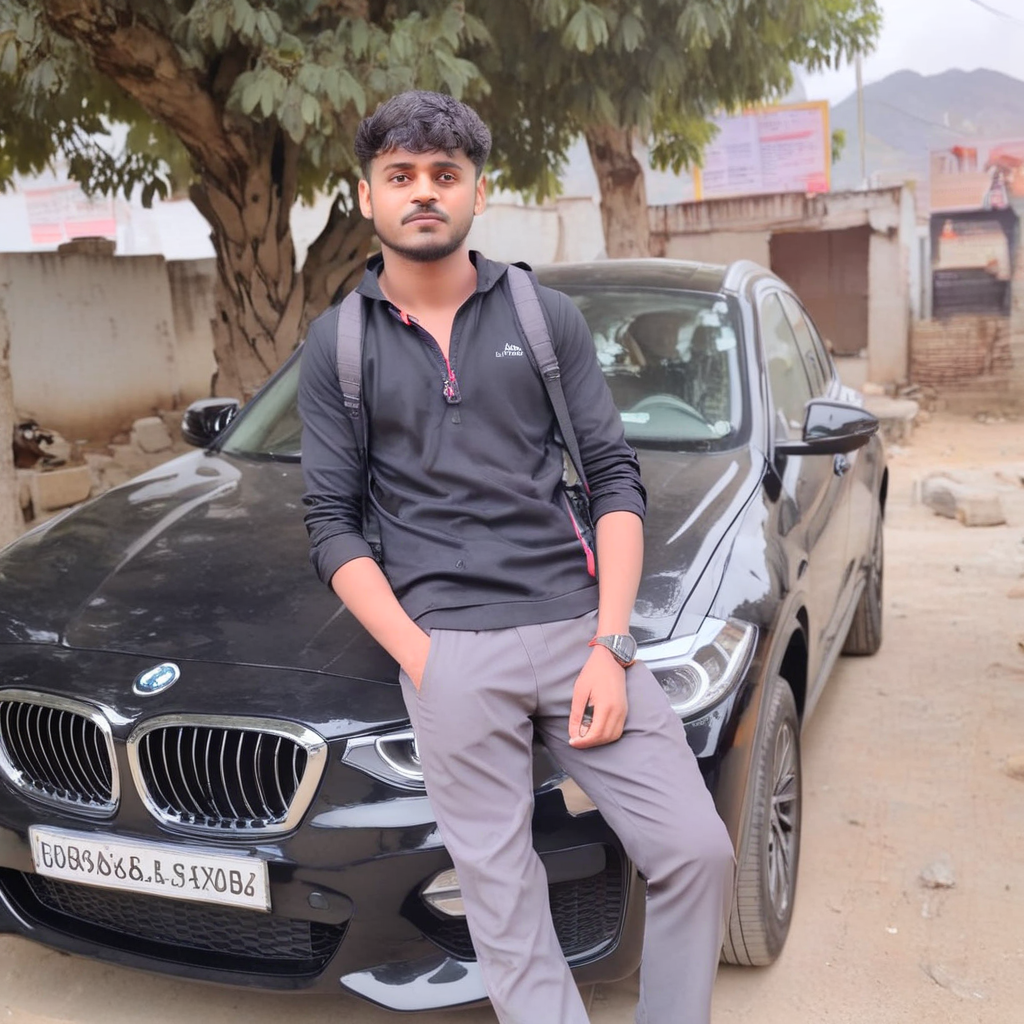

✅ All done! Check your model at https://huggingface.co/Bharatgwl/sdxl-Sumit-lora


In [36]:
pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16
).to("cuda")

pipe.load_lora_weights(REPO_ID)

test_prompts = [
    "a photo of Sumit person, standing by a car with ultra realistic look ",
    ]

# test_prompts = [
#     "a photo of Sumit person, professional headshot, 8k",
#     "a photo of Sumit person, casual outdoor photo, natural lighting",
#     "a photo of Sumit person, artistic portrait, dramatic lighting"
# ]

print("Generating test images...")
for i, prompt in enumerate(test_prompts):
    image = pipe(prompt, num_inference_steps=30).images[0]
    image.save(f"/content/test_{i+1}.png")
    display(image)

print("✅ All done! Check your model at https://huggingface.co/Bharatgwl/sdxl-Sumit-lora")

In [42]:
prompt = """
a photo of Sumit person, standing by a car with ultra realistic look
"""

In [43]:
negative_prompt = """
blurry, low quality, distorted face, extra fingers,
deformed eyes, bad anatomy, mutated face,
oversharpened, plastic skin, cartoon,
asymmetrical face, warped facial features,
extra limbs, duplicate face
"""

In [44]:
pipe.load_lora_weights(REPO_ID)

/usr/local/lib/python3.12/dist-packages/peft/tuners/tuners_utils.py:1926: UserWarning: Adapter cannot be set when the model is merged. Unmerging the model first.
  warnings.warn("Adapter cannot be set when the model is merged. Unmerging the model first.")
No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new
No LoRA keys associated to CLIPTextModelWithProjection found with the prefix='text_encoder_2'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModelWithProjection related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


In [45]:
pipe.fuse_lora(lora_scale=0.7)   # try 0.7–0.85 range

Generating image...


  0%|          | 0/35 [00:00<?, ?it/s]

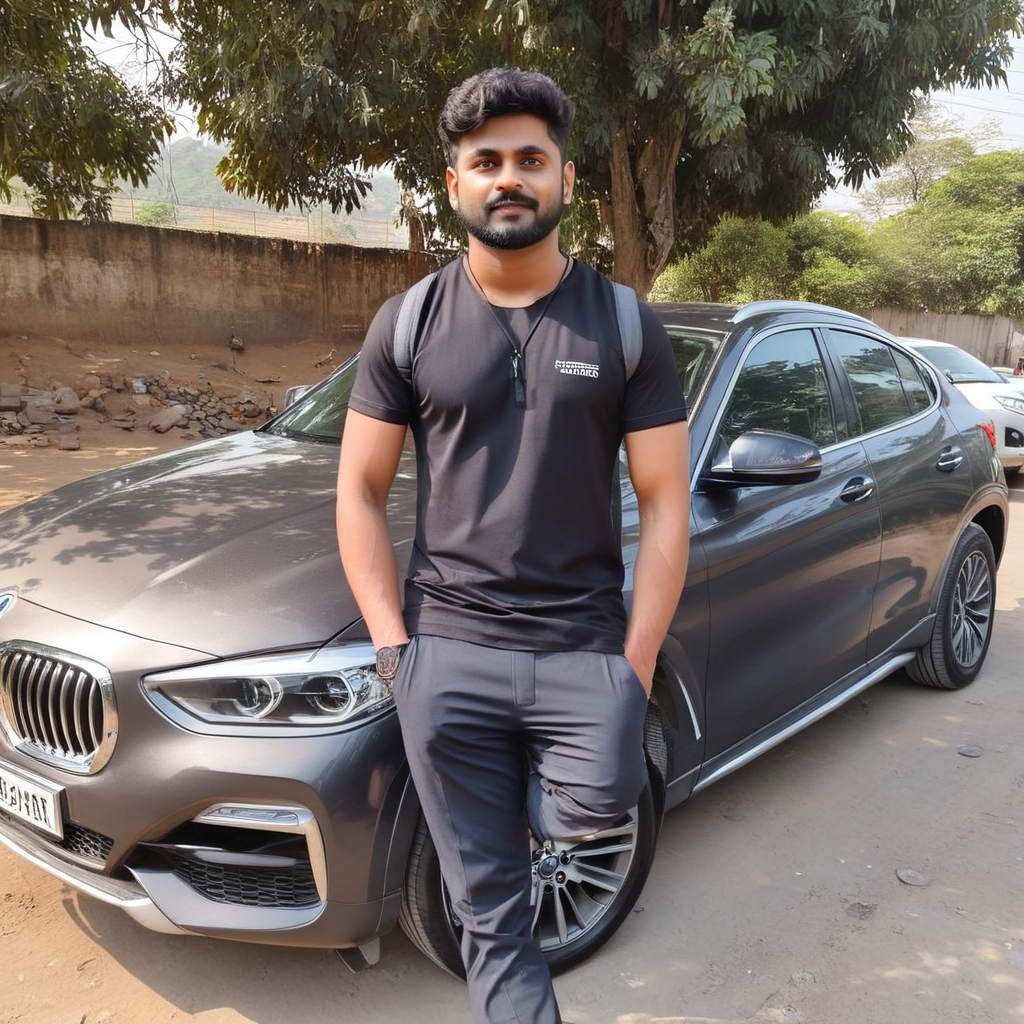

In [46]:
print("Generating image...")

image = pipe(
    prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=35,
    guidance_scale=7,
).images[0]


display(image)

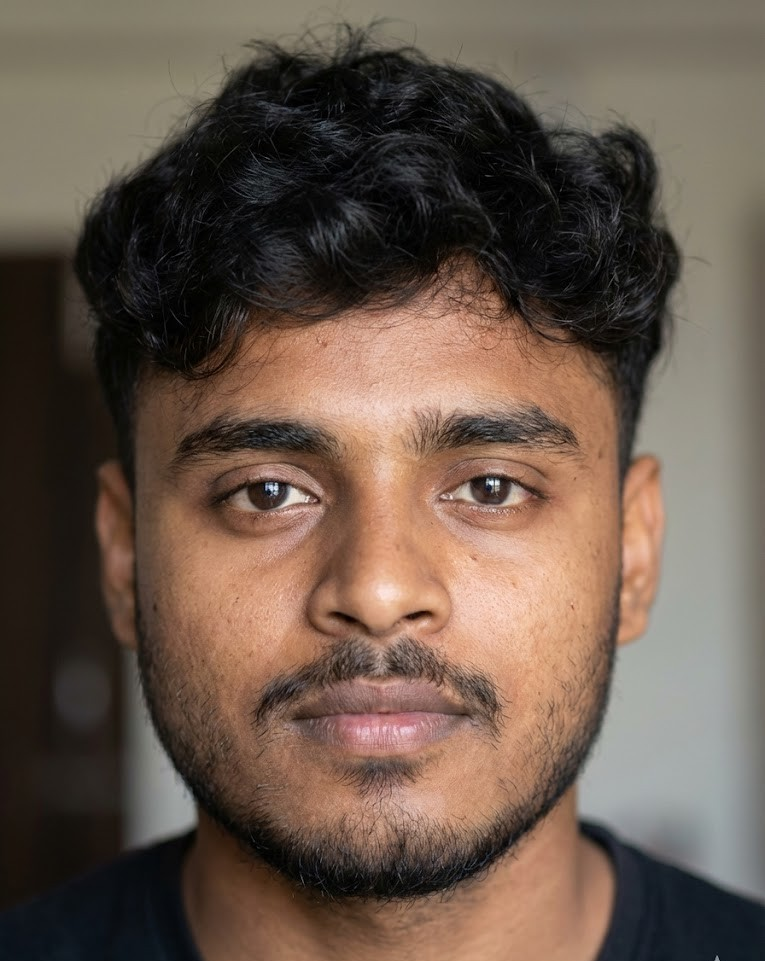

In [49]:
from IPython.display import Image, display
display(Image('/content/testimage.jpg'))

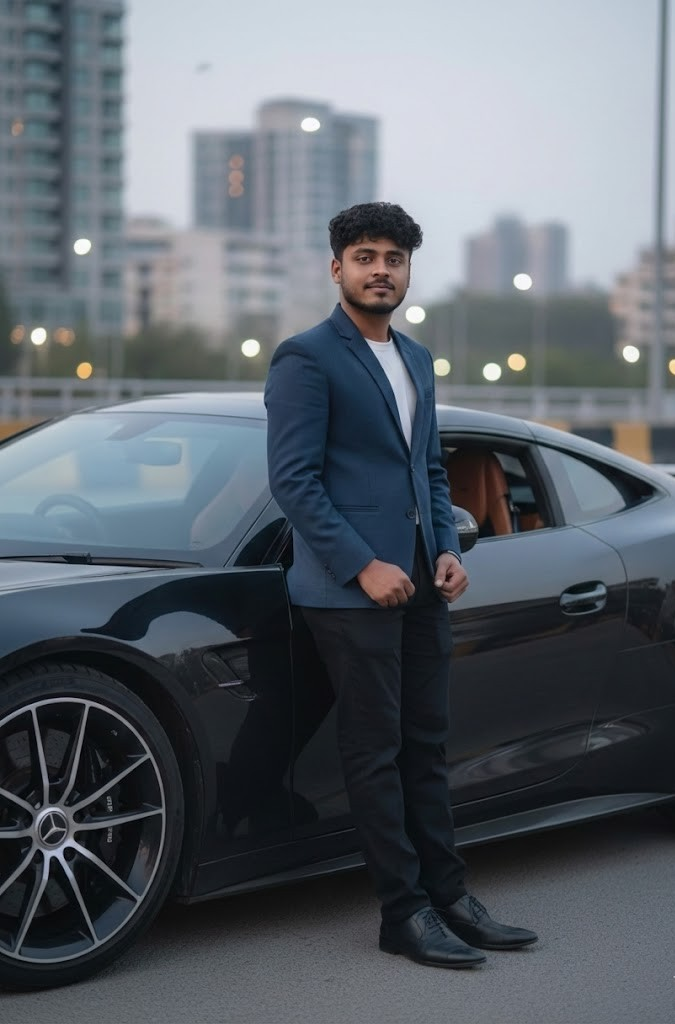

In [50]:
display(Image('/content/testimage1.jpg'))

In [51]:
prompt="""close-up shot from 45 cm  headshot of Sumit person,
highly detailed realistic face, with identical facial feature , with bmw car behind it
accurate jawline and facial symmetry,
natural skin texture, visible pores,
DSLR 85mm lens portrait,
soft natural lighting,
RAW photography, ultra sharp focus,
no distortion, true facial proportions"""

  0%|          | 0/35 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/diffusers/pipelines/stable_diffusion_xl/pipeline_stable_diffusion_xl.py:748: FutureWarning: `upcast_vae` is deprecated and will be removed in version 1.0.0. `upcast_vae` is deprecated. Please use `pipe.vae.to(torch.float32)`. For more details, please refer to: https://github.com/huggingface/diffusers/pull/12619#issue-3606633695.
  deprecate(


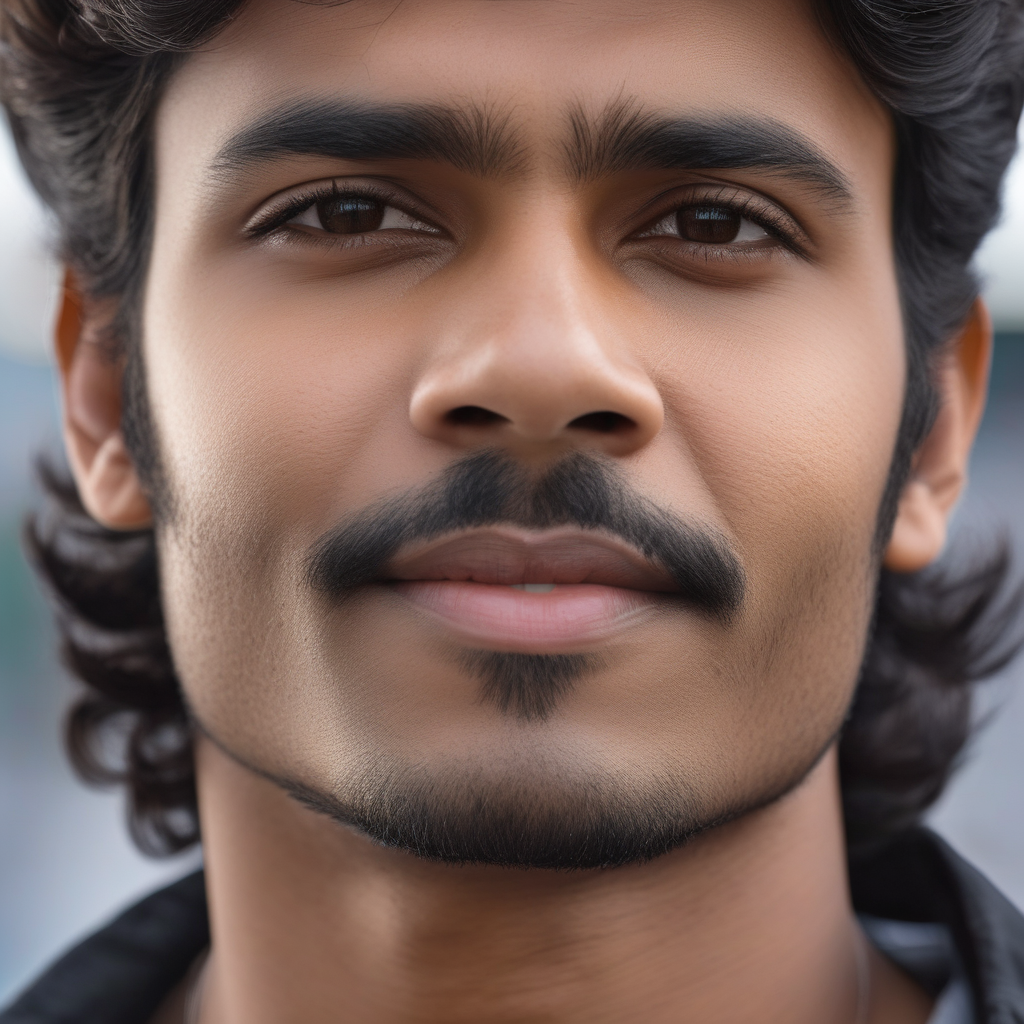

In [52]:
image = pipe(
    prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=35,
    guidance_scale=7,
).images[0]


display(image)